In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reviews_df = pd.read_excel('Womens Clothing Reviews Data.xlsx')
reviews_df.head(5)

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


# Data Overview <a class="anchor" id="data-overview"></a>

In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [4]:
reviews_df['Review Title'].value_counts()

Love it!                                   136
Beautiful                                   95
Love                                        88
Love!                                       84
Beautiful!                                  72
                                          ... 
Perfect transition dress                     1
The perfect spring dress!                    1
Super soft but can make you look frumpy      1
More structured than a cardi                 1
Please make more like this one!              1
Name: Review Title, Length: 13993, dtype: int64

In [5]:
pd.options.display.max_colwidth = None
reviews_df['Review Text'].sample(1)

21631    I purchased the grey color, and i love love love everything about this dress. the fabric is so soft and feels like pj's. i'm just shy of 5'9" and the length is perfect for work. i purchased the medium, the fit was perfect for me (size 8, 138 lb).\n\nhighly recommended!!
Name: Review Text, dtype: object

We found that text would get cut off if the character length exceeded 500.

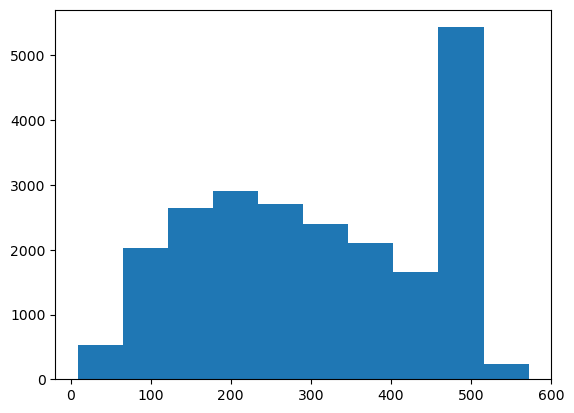

In [6]:
plt.hist(reviews_df['Review Text'].str.len())
plt.show()

In [7]:
reviews_df[reviews_df['Review Text'].str.len() == 500]['Review Text']

2            I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c
14           This is a nice choice for holiday gatherings. i like that the length grazes the knee so it is conservative enough for office related gatherings. the size small fit me well - i am usually a size 2/4 with a small bust. in my opinion it runs small and those with larger busts will definitely have to size up (but then perhaps the waist will be too big). the problem with this dress is the quality. the fabrics are terrible. the delicate netting type fabric on the top layer of

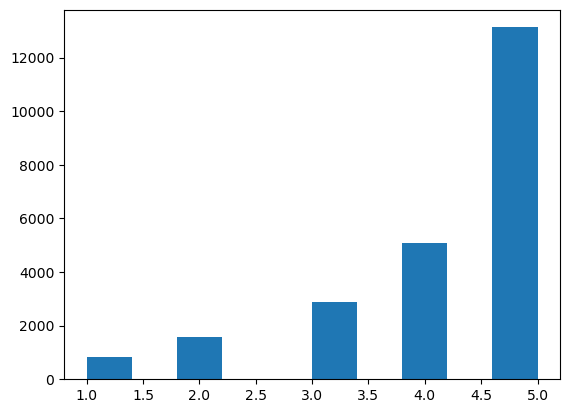

In [8]:
plt.hist(reviews_df['Rating'])
plt.show()

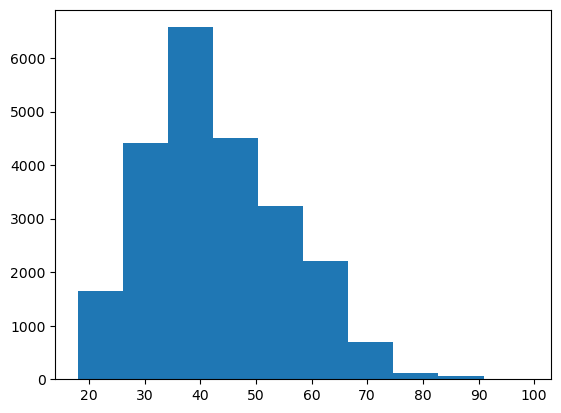

In [9]:
plt.hist(reviews_df['Customer Age'])
plt.show()

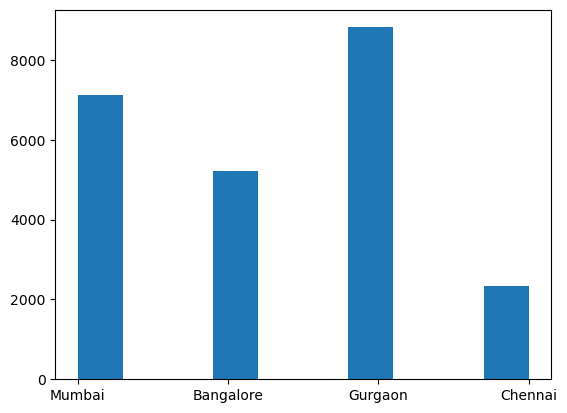

In [10]:
plt.hist(reviews_df['Location'])
plt.show()

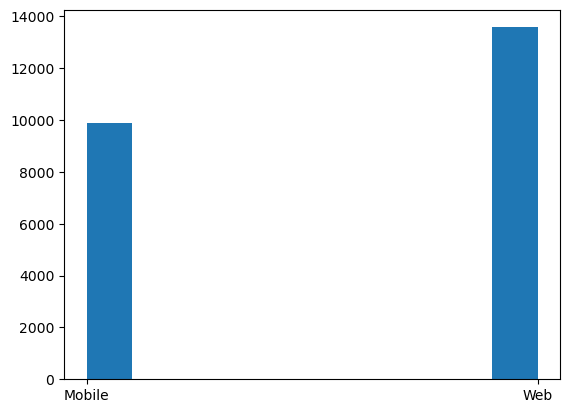

In [11]:
plt.hist(reviews_df['Channel'])
plt.show()

In [12]:
reviews_df.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

# Data Preprocess <a class="anchor" id="data-preprocess"></a>

In [13]:
reviews_df['Review Text'] = reviews_df['Review Text'].str.strip()
reviews_df['Review Title'] = reviews_df['Review Title'].str.strip()
reviews_df['Category'] = reviews_df['Category'].str.strip()
reviews_df['Subcategory1']= reviews_df['Subcategory1'].str.strip()
reviews_df['SubCategory2']= reviews_df['SubCategory2'].str.strip()

reviews_df['Review Text'] = reviews_df['Review Text'].fillna('')
reviews_df['Review Title'] = reviews_df['Review Title'].fillna('')
reviews_df['Category'] = reviews_df['Category'].fillna('')
reviews_df['Subcategory1']= reviews_df['Subcategory1'].fillna('')
reviews_df['SubCategory2']= reviews_df['SubCategory2'].fillna('')

# Replace typo
reviews_df['Category'] = reviews_df['Category'].replace({'Initmates': 'Intimates'})

# Replace for consistency between division, department, and class names
reviews_df['Subcategory1'] = reviews_df['Subcategory1'].replace({'Intimate': 'Intimates'})

In [14]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
words = set(nltk.corpus.brown.words())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nihal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We remove parentheses from our text and remove the last word from the text if it doesn't belong in the Brown corpus. This accounts for reviews that were cut off for exceeding the character limit.

In [15]:
reviews_text = reviews_df['Review Text'].copy()
for idx in range(len(reviews_text)):
    reviews_text[idx] = reviews_text[idx].lower().replace('(','').replace(')','')  # Convert to lowercase and remove parentheses.
    reviews_text[idx] = word_tokenize(reviews_text[idx])  # Split into words.
    filtered_sentence = [w for w in reviews_text[idx] if not w.lower() in stopwords.words('english')]
    if filtered_sentence and filtered_sentence[-1]  not in words:
        reviews_text[idx] = filtered_sentence[:-1]
    else:
        reviews_text[idx] = filtered_sentence

In [16]:
reviews_text.sample(5)

103                                                                                                                                                                                                                                                                  [fabric, felt, cheap, n't, find, flattering, top, ., reference, wearing, medium, photos, measurements, 38-30-40, .]
7679                                                                                                                                                                                                                                                                                                                                                 [glad, got, sweater.it, perfect, !]
16407                                                                                                                                                                                                [worn, dress, jean, jacket, ,, birkenstocks, dres

### Lemmatize 

**Lemmatizing vs Stemming**

**Stemming** reduces a word to its stem form by removing the last few letters of the word. Requires shorter runtime.
Ex: Caring -> Car

**Lemmatizing** reduces a word to a meaningful base form by considering the word's context and shortening it into a *lemma*. More computationally expensive.
Ex: Caring -> Care

In [17]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
lemmatizer = WordNetLemmatizer()
pos_reviews = [pos_tag(text) for text in reviews_text]
pos_reviews[0]

[('absolutely', 'RB'),
 ('wonderful', 'JJ'),
 ('-', ':'),
 ('silky', 'NN'),
 ('sexy', 'NN'),
 ('comfortable', 'JJ')]

In [18]:
def lemmatize_pos_word(word, tag):
    wntag = tag[0].lower()
    wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
    if not wntag:
        lemma = word
    else:
        lemma = lemmatizer.lemmatize(word, wntag)
    return lemma

text = [[lemmatize_pos_word(word, tag) for word, tag in review] for review in pos_reviews]

In [19]:
# Compute bigrams.
from gensim.models import Phrases

# Add bigrams and trigrams to docs (only ones that appear 20 times or more).
bigram = Phrases(text, min_count=20)
for idx in range(len(text)):
    for token in bigram[text[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text[idx].append(token)

In [20]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(text)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

In [21]:
corpus = [dictionary.doc2bow(doc) for doc in text]

In [22]:
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 2445
Number of documents: 23486


# LDA Model <a class="anchor" id="lda"></a>

In [23]:
# Train LDA model.
from gensim.models import LdaModel
from pprint import pprint
def create_lda_model(num_topics = 10):
    # Set training parameters.
    chunksize = 2000
    passes = 20
    iterations = 400
    eval_every = None  # Don't evaluate model perplexity, takes too much time.

    # Make an index to word dictionary.
    temp = dictionary[0]  # This is only to "load" the dictionary.
    id2word = dictionary.id2token

    model = LdaModel(
        corpus=corpus,
        id2word=id2word,
        chunksize=chunksize,
        alpha='auto',
        eta='auto',
        iterations=iterations,
        num_topics=num_topics,
        passes=passes,
        eval_every=eval_every,
        random_state  = 1
    )
    return model

def get_average_topic_coherence(model):
    top_topics = model.top_topics(corpus)
    # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
    avg_topic_coherence = sum([t[1] for t in top_topics]) / model.num_topics
    return avg_topic_coherence

def get_top_topics(model):
    top_topics = model.top_topics(corpus)
    # Average topic coherence is the sum of topic coherences of all topics, divided by the number of topics.
    return top_topics

In [24]:
from gensim.models import CoherenceModel
topic_coherences = []
models = []
for num_topics in range(2, 12):
    model = create_lda_model(num_topics = num_topics)
    average_topic_coherence = get_average_topic_coherence(model)
    print(f"Num topics: {num_topics}")
    coherence_model_lda = CoherenceModel(
        model=model, texts=text, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('Coherence Score: ', coherence_lda)
    topic_coherences.append(coherence_lda)
    models.append(model)

Num topics: 2
Coherence Score:  0.444810911490756
Num topics: 3
Coherence Score:  0.508707474777839
Num topics: 4
Coherence Score:  0.5229071421509399
Num topics: 5
Coherence Score:  0.5157015925388759
Num topics: 6
Coherence Score:  0.49977543184999157
Num topics: 7
Coherence Score:  0.48393221193021824
Num topics: 8
Coherence Score:  0.4973181268511009
Num topics: 9
Coherence Score:  0.47100341519599304
Num topics: 10
Coherence Score:  0.48984317977892894
Num topics: 11
Coherence Score:  0.46642256384710057


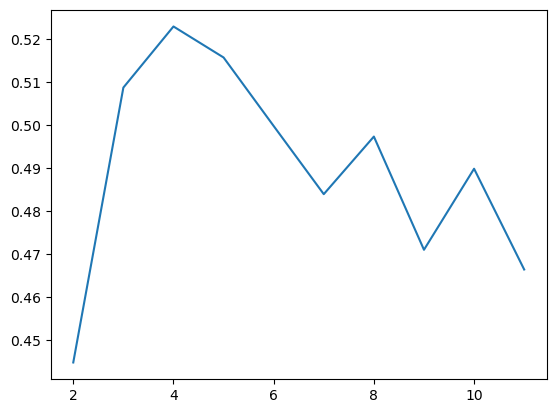

In [25]:
plt.plot(list(range(2, 12)), topic_coherences)

In [26]:
pprint(get_top_topics(models[5]))

[([(0.025719041, 'top'),
   (0.024951534, 'look'),
   (0.024252277, 'like'),
   (0.023947287, 'size'),
   (0.023892283, "n't"),
   (0.01857755, 'fit'),
   (0.018037427, 'would'),
   (0.01535999, 'fabric'),
   (0.013183292, 'small'),
   (0.01279505, "'s"),
   (0.012467526, 'order'),
   (0.012143415, 'really'),
   (0.012102763, 'dress'),
   (0.010902217, 'make'),
   (0.0108766, 'little'),
   (0.010280762, 'run'),
   (0.010130128, 'back'),
   (0.010009877, 'think'),
   (0.009533965, 'large'),
   (0.008692212, "'m")],
  -1.6353266727135263),
 ([(0.07430911, '!'),
   (0.045445736, 'love'),
   (0.0397078, 'wear'),
   (0.038431857, 'dress'),
   (0.030488994, 'great'),
   (0.017983088, 'perfect'),
   (0.016830398, 'fit'),
   (0.016604343, 'buy'),
   (0.016332401, 'get'),
   (0.01562232, 'comfortable'),
   (0.013135342, 'jean'),
   (0.011959632, "'s"),
   (0.010549862, 'pant'),
   (0.008657966, 'super'),
   (0.008267918, 'purchase'),
   (0.0076430035, 'look'),
   (0.0071717766, 'summer'),
   (0

#### Interpretation

From the coherence scores, we see that performing LDA with 7 topics gives the best results. We can interpret the topics as follows:

Topic 1: love, wear, great, perfect
Topic 2: good, quality, picture, look
Topic 3: nice, top, shirt, fabric
Topic 4: size, fit (talks about differents fits)
Topic 5: dress, length, petite, waist
Topic 6: not, one, get
Topic 7: saw, store, can't, wait

From this, we can see mentions of fit and material, particularly about the shirts and dresses. 
However, this can suggest a lack of emphasis on other catalog items like bottoms. With this, we can look in depth into what is and isn't being mentioned more commonly with bottoms that we feel we can improve on.

We also note that improving this dataset with sentiment annotations would allow us to extract opinions regarding each of these topics, so we can see if there is more positive or negative sentiment regarding the quality or size of products.

# Latent Semantic Analysis <a class="anchor" id="lsa"></a>

For LSA, we apply SVD to achieve a decomposition of our data, where our number of singular values would equal the number of topics we predesignate.

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

X = reviews_df['Review Text'].copy().values
# for idx in range(len(X)):
#     X[idx] = X[idx].lower()
vectorizer = TfidfVectorizer(stop_words = stopwords.words('english'), 
                             ngram_range = (1,2),
                             lowercase = False,
                             tokenizer = word_tokenize
                            )
train_X = train_test_split(X, train_size = 0.8)[0]
train_X_tfidf = vectorizer.fit_transform(train_X)

C:\Users\nihal\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\nihal\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


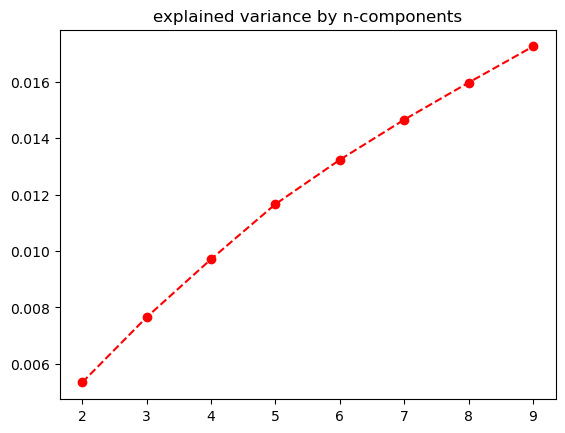

In [35]:
performance = []
compenents = range(2, 10, )
for n in compenents:
    svd = TruncatedSVD(n_components=n, n_iter=100, random_state=0)
    lsa = svd.fit(train_X_tfidf)
    performance.append(lsa.explained_variance_ratio_.sum())
plt.plot(list(compenents), performance, 'ro--')
plt.title('explained variance by n-components');

Even with SVD, the explained variance would be too small unless the number of components was very large. Since a large number of components would take too long to compute, we decide that LSA would not be reasonable to use here.